Challenge link: https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier

For this challenge, you will complete the code below to classify images of dogs and cats. You will use Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

You can tweak epochs and batch size if you like, but it is not required.

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

train_data_gen is a generator object that yields batches of image data (and labels) from your directory on the fly. It's created using Keras' ImageDataGenerator.flow_from_directory() method, and is designed to help you efficiently feed data into a neural network during training.<br><br>

Here's what train_data_gen specifically is:
It's a DirectoryIterator — an iterator over the images found in your specified directory ('cats_and_dogs/train'), automatically labeled based on the subdirectory names (cats and dogs).<br><br>

It yields batches of images and corresponding labels. For example, calling next(train_data_gen) will return a tuple (images, labels):<br>
images: a NumPy array of shape (batch_size, IMG_HEIGHT, IMG_WIDTH, 3)<br>
labels: a NumPy array of binary labels (0 or 1, because of class_mode='binary')<br>
<br>

Summary of What It Does:
Loads images from the disk in batches.

Rescales pixel values (here, using rescale=1.0/255).

Assigns labels based on folder names: e.g., cats → 0, dogs → 1.

Feeds the batches into your model during training (e.g., with model.fit(train_data_gen, ...)).

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1.0/255)
validation_image_generator = ImageDataGenerator(rescale = 1.0/255)
test_image_generator = ImageDataGenerator(rescale = 1.0/255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
                                                      '/content/cats_and_dogs',
                                                      classes=['test'],
                                                      batch_size=batch_size,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      class_mode='binary',
                                                      shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


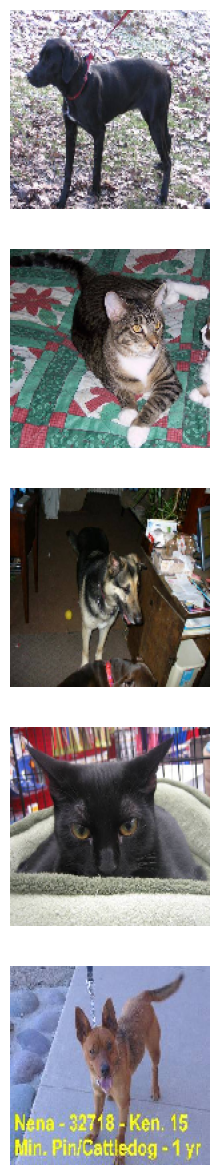

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [ ]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=15, width_shift_range=0.2,
                        height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
                        vertical_flip=True, rescale=1./255)

You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


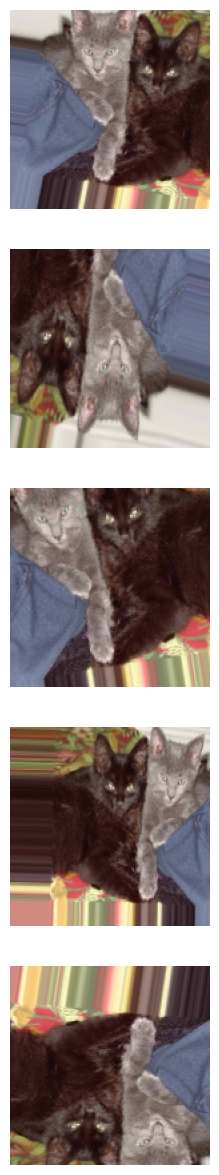

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    37,880,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,904,417 (144.59 MB)

 Trainable params: 37,904,417 (144.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Change the filepath to include the .keras extension
# checkpoint = ModelCheckpoint( filepath='./best_model_epoch_{epoch:02d}_val_acc_{val_accuracy:.4f}.keras',
#                               monitor='val_accuracy', # Changed 'val_acc' to 'val_accuracy' as per standard history dictionary keys
#                               verbose=1,
#                               save_best_only=True,
#                               mode='auto',
#                               save_freq='epoch')

# history = model.fit(x=train_data_gen, epochs=10, validation_data=val_data_gen, callbacks=[checkpoint])

history = model.fit(train_data_gen, epochs=10, validation_data=val_data_gen)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.6998 - loss: 0.5713 - val_accuracy: 0.6790 - val_loss: 0.5861
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.6593 - loss: 0.6059 - val_accuracy: 0.6880 - val_loss: 0.5790
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.7092 - loss: 0.5715 - val_accuracy: 0.6890 - val_loss: 0.5721
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.6798 - loss: 0.5686 - val_accuracy: 0.6970 - val_loss: 0.5819
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.6806 - loss: 0.5694 - val_accuracy: 0.7010 - val_loss: 0.5638
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.6847 - loss: 0.5793 - val_accuracy: 0.6880 - val_loss: 0.5753
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.6862 - loss: 0.5769 - val_accuracy: 0.7240 - val_loss: 0.5556
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.7051 - loss: 0.5692 - val_accuracy: 0.7170 - val_los

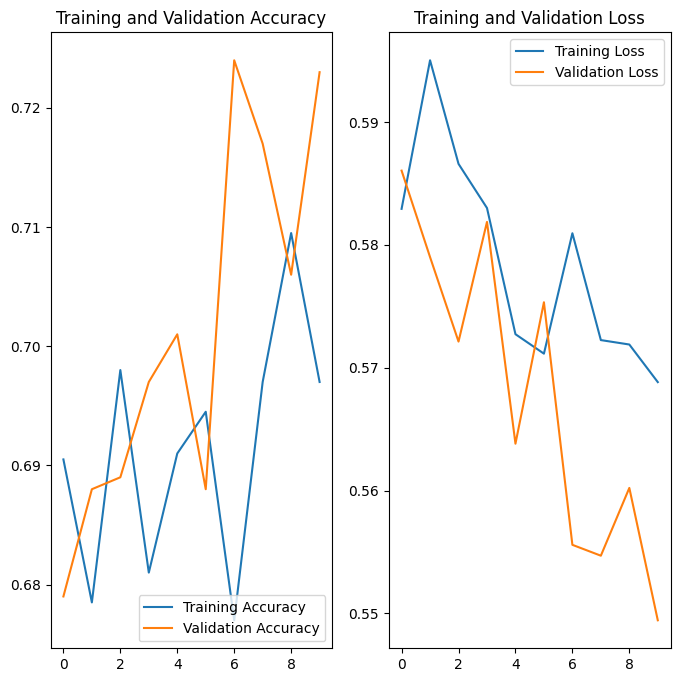

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs_range based on the actual number of epochs trained
epochs_range = range(len(history.history['accuracy'])) # Changed from range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
plotImages(sample_training_images[:50], probabilities)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  # Access the scalar value within the NumPy array before rounding
  if round(probability[0]) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
